In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print("tf.__version__",tf.__version__)

tf.__version__ 2.1.0


In [2]:
x=[137.97, 104.50, 100.00, 124.32, 79.20, 99.00, 124.00, 114.00,106.69,138.05,53.75,46.91,68.00, 63.02,81.26,86.21]
y=[145.00,110.00,93.00,116.00,65.32,104.00, 118.00,91.00,62.00, 133.00, 51.00, 45.00,78.50,69.65, 75.69,95.30]
x_test=[128.15, 45.00, 141.43, 106.27, 99.00, 53.84, 85.36, 70.00]

In [3]:
X=tf.constant(x)
Y=tf.constant(y)
times=10
lr=0.0001
display_step=1

In [4]:
np.random.seed(612)
w=tf.Variable(np.random.randn())
b=tf.Variable(np.random.randn())
Y_pred=w*X+b
loss=Y-Y_pred
print("0",0,"w",w.numpy(),"b",b.numpy())
mse=[]
for i in range(times+1):
    with tf.GradientTape() as tape:
        Y_pred=w*X+b
        loss=tf.reduce_mean((Y-Y_pred)**2)*0.5
#         loss=tf.reduce_mean(tf.square(Y-Y_pred))*0.5
    dl_dw,dl_db=tape.gradient(loss,[w,b])
    w.assign_sub(lr*dl_dw)
    b.assign_sub(lr*dl_db)
    mse.append(loss)
    if i % display_step == 0:
        print("i",i,"loss",loss.numpy(),"w",w.numpy(),"b",b.numpy())   

0 0 w -0.013377065 b -1.1628988
i 0 loss 4749.3623 w 0.94604725 b -1.153577
i 1 loss 89.86186 w 0.9578425 b -1.1534119
i 2 loss 89.1575 w 0.957987 b -1.1533593
i 3 loss 89.15738 w 0.9579883 b -1.1533082
i 4 loss 89.157364 w 0.95798784 b -1.153257
i 5 loss 89.15732 w 0.95798737 b -1.1532059
i 6 loss 89.15728 w 0.95798683 b -1.1531547
i 7 loss 89.157265 w 0.95798635 b -1.1531036
i 8 loss 89.15722 w 0.9579859 b -1.1530524
i 9 loss 89.15721 w 0.9579854 b -1.1530013
i 10 loss 89.157196 w 0.95798486 b -1.1529502


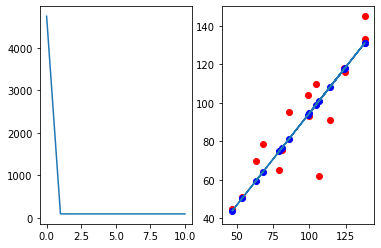

In [5]:
plt.subplot(1,2,1)
plt.plot(mse)
plt.subplot(1,2,2)
plt.scatter(x,y,color="red")
plt.scatter(x,Y_pred,color="blue")
plt.plot(x,Y_pred)
plt.show()